In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
from sklearn.linear_model import LinearRegression
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams

In [2]:
# Load data
df = pd.read_csv("product_demand_raw.csv", names = ['demand'])
df['week'] = np.arange(1,len(df)+1,1)
df.head()

demand  week
0  29030.001     1
1  28930.000     2
2  28830.000     3
3  29020.000     4
4  27000.000     5

In [3]:
# x: week, y:demand 
x = df['week']
y = df['demand']

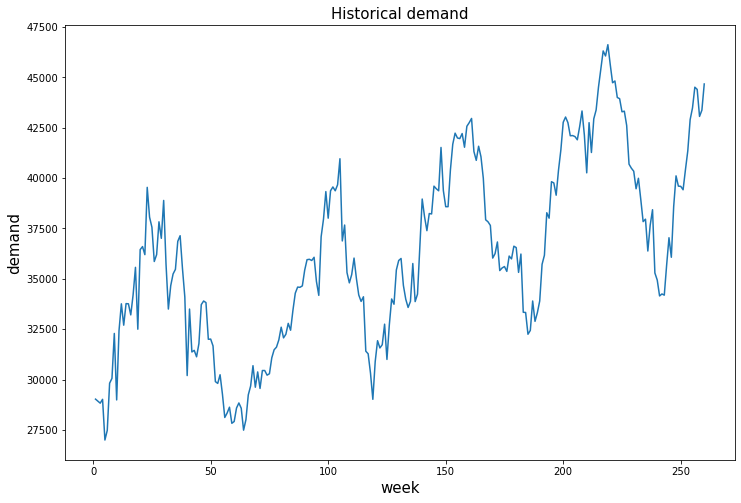

In [4]:
# Plot historical data
plt.figure(figsize=(12,8))
plt.plot(df['week'], df['demand'])
plt.xlabel('week', fontsize = 15)
plt.ylabel('demand', fontsize = 15)
plt.title("Historical demand",fontsize = 15)
plt.show()

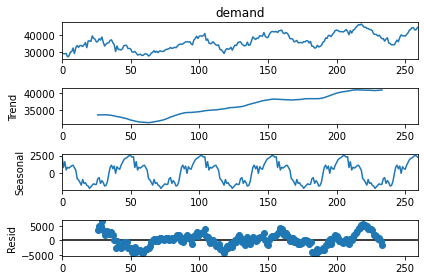

In [5]:
# Decomposition of time-series historical data
series = df['demand']
result = seasonal_decompose(series, model='additive', period=52)
result.plot()
plt.show()

In [6]:
# Set the value of Alpha and define m (time period) for modelling and forecasting
m = 52
alpha = 1/(2*m)

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Single Exponential Smoothing'}>

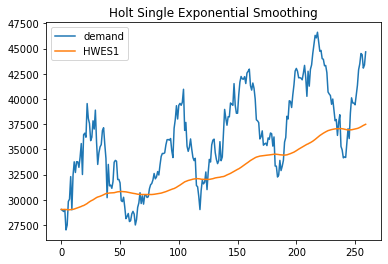

In [7]:
# Single exponential smoothing
df["HWES1"] = SimpleExpSmoothing(df['demand']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[["demand","HWES1"]].plot(title="Holt Single Exponential Smoothing")

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Holt Double Exponential Smoothing: Additive Trend'}>

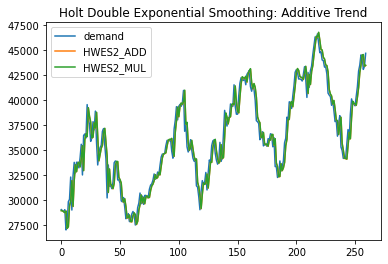

In [8]:
# Double exponential smoothing 
df["HWES2_ADD"] = ExponentialSmoothing(df["demand"],trend="add").fit().fittedvalues
df["HWES2_MUL"] = ExponentialSmoothing(df["demand"],trend="mul").fit().fittedvalues
df[["demand","HWES2_ADD",'HWES2_MUL']].plot(title="Holt Double Exponential Smoothing: Additive Trend")

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Holt Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}>

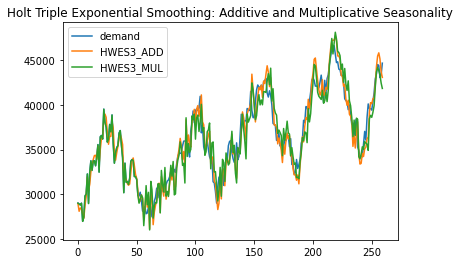

In [9]:
# Triple exponential smoothing
df['HWES3_ADD'] = ExponentialSmoothing(df['demand'],trend="add",seasonal='add',seasonal_periods=52).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['demand'],trend='mul',seasonal='mul',seasonal_periods=52).fit().fittedvalues
df[['demand','HWES3_ADD','HWES3_MUL']].plot(title='Holt Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [10]:
# Forecasting with Holt Exponential Smoothing using train and test data
train_forecast_data = pd.read_csv("product_demand_raw.csv", names = ['demand'])
train_forecast_data.index.freq = "MS"

# Split into train and test data set
train = train_forecast_data[:183]
test = train_forecast_data[183:]

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using HES')

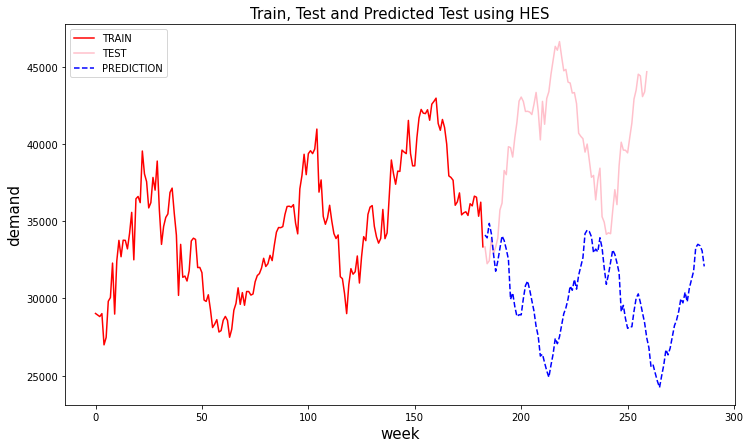

In [11]:
# Forecast train data for 70% of historical data to compare to original historical data
fitted_model = ExponentialSmoothing(train["demand"],trend='mul',seasonal='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(104)

# Plotting Actual (Pink Line) VS Prediction (Dotted Blue Line)
train['demand'].plot(legend=True,color = 'red', label="TRAIN")
test['demand'].plot(legend=True,color = 'pink',label="TEST",figsize=(12,7))
test_predictions.plot(legend=True,style = '--',color = 'blue',label='PREDICTION')
plt.xlabel("week", fontsize = 15)
plt.ylabel("demand", fontsize = 15)
plt.title('Train, Test and Predicted Test using HES', fontsize = 15)

In [13]:
# Save forecast data
forecast = pd.DataFrame(test_predictions)
forecast.to_csv("P_VaaT_Supporting_Documents_Q2.1_HES_Forecast.csv")